# House Sales in King County, USA
dataset obtained from Kaggle: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
## Objective:
### Using multivariate Linear Regression, predict the prices of houses.

# --------------------------------------------------------------------------------------------------


### Importing the relevant libraries

In [451]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [452]:
# Making sure that the class variable is on the -1 index and not in the middle of the dataset
dataset = pd.read_csv('kc_house_data.csv')
price = dataset.pop('price')
sqft_lot15 = dataset.pop('sqft_lot15')
dataset['sqft_lot15'] = sqft_lot15
dataset['price'] = price

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]


### Splitting the dataset into the train and test sets.

In [453]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------------------------------------------------------------------------------
### Visualizing the data to begin with.

In [454]:
dataset.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [455]:
dataset.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,4.580302e+09,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,5.400881e+05
std,2.876566e+09,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,3.671272e+05
min,1.000102e+06,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.500000e+04
25%,2.123049e+09,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,3.219500e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [456]:
dataset.select_dtypes(include=[object])

,date
0,20141013T000000
1,20141209T000000
2,20150225T000000
3,20141209T000000
4,20150218T000000
...,...
21608,20140521T000000
21609,20150223T000000
21610,20140623T000000
21611,20150116T000000


Transforming the date "object" into an actual datetime format.

In [457]:
# Removing the 'T000000' present at the end of the strings in the original format
def strip_string(string):
    string = string[:8]
    return string

dataset['date'] = dataset['date'].apply(strip_string)
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y%m%d')
dataset['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

Some quick correlation visualization to get a better idea of what I'm working with

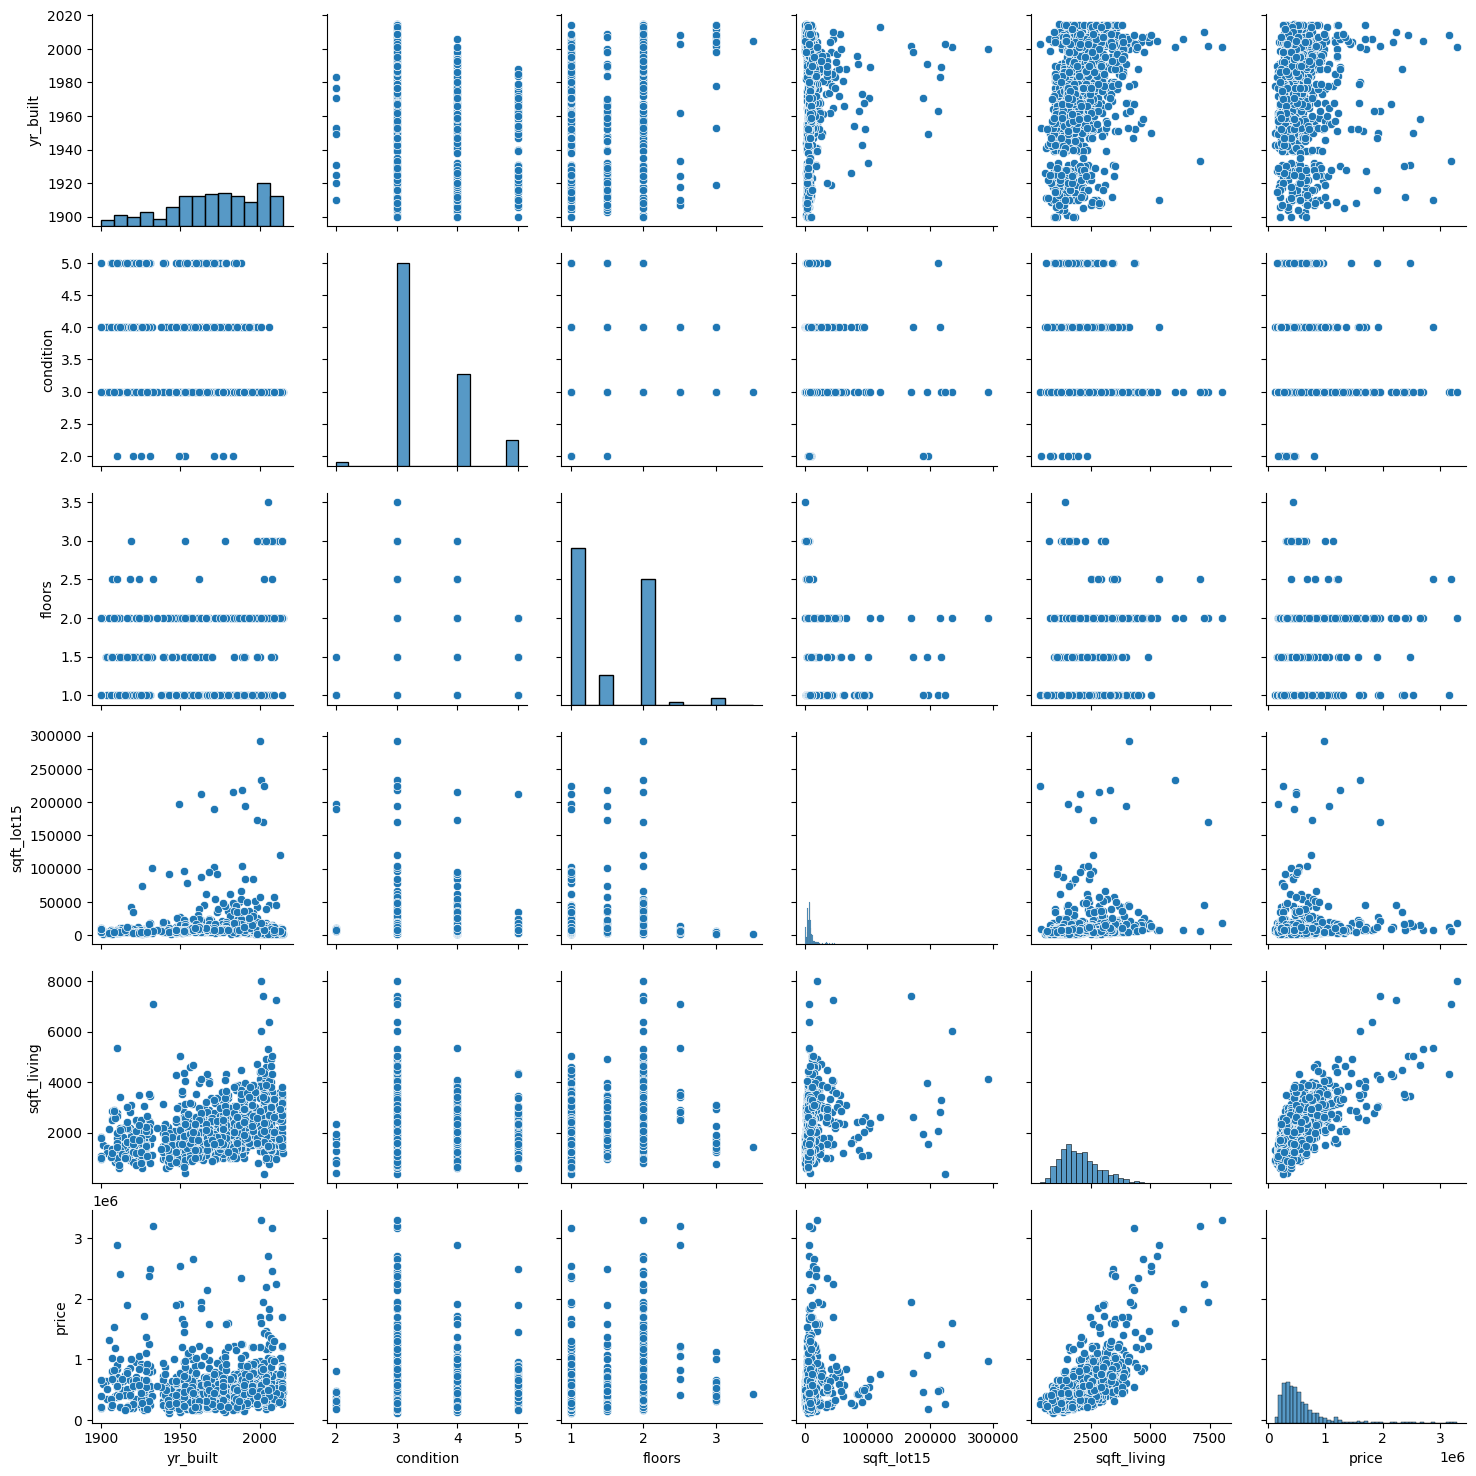

In [458]:
import seaborn as sns
import random
random_indexes = random.sample(range(len(dataset)), 1000)
sample_data = dataset.loc[random_indexes, ['yr_built', 'condition', 'floors', 'sqft_lot15', 'sqft_living', 'price']]
sns.pairplot(data=sample_data)

# To be continued:
### next I'm going to remove outliers from the attributes above and a few others. Possibly combine some attributes as well.

## Manipulating the data
Making it more suitable for a machine learning model.

<AxesSubplot:>

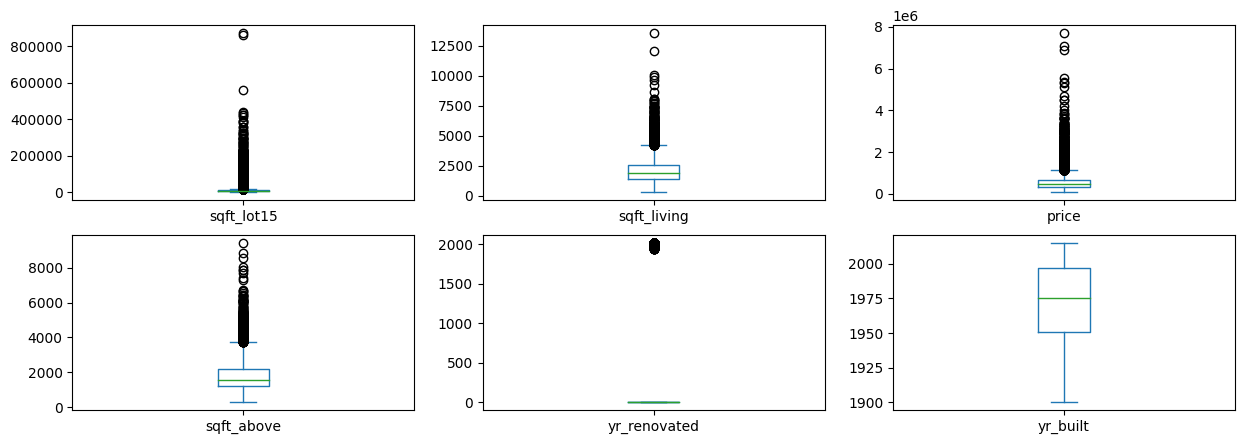

In [459]:
# visualizing a few boxplots
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

dataset['sqft_lot15'].plot(kind='box', ax=axes[0][0])
dataset['sqft_living'].plot(kind='box', ax=axes[0][1])
dataset['price'].plot(kind='box', ax=axes[0][2])
dataset['sqft_above'].plot(kind='box', ax=axes[1][0])
dataset['yr_renovated'].plot(kind='box', ax=axes[1][1])
dataset['yr_built'].plot(kind='box', ax=axes[1][2])

From here, it becomes clear that yr_renovated has several properties listed as 0 due to never having been renovated. This will cause problems in the model, so I will change them from zero to be the same as the build year. 

<AxesSubplot:>

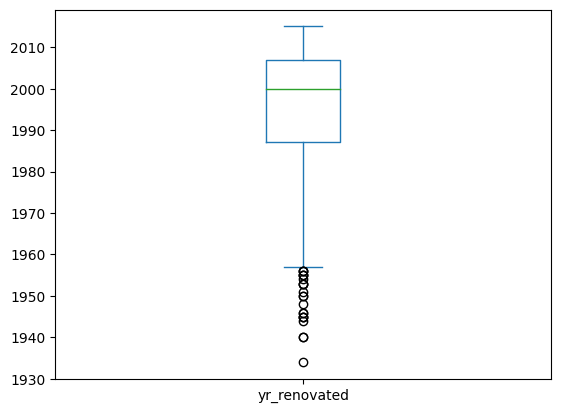

In [460]:
renovated_dataset = dataset[dataset['yr_renovated'] != 0]
renovated_dataset['yr_renovated'].plot(kind='box')

<AxesSubplot:>

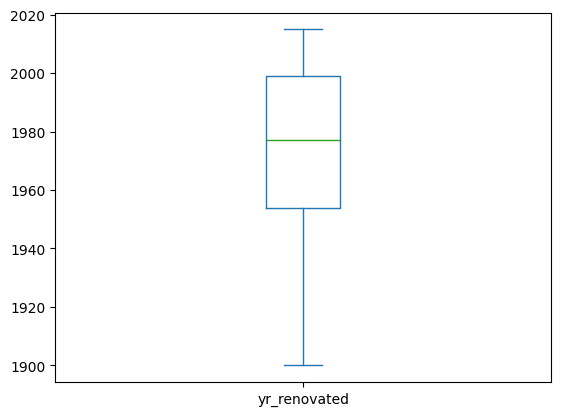

In [461]:
def to_yrbuilt(df):
    i = 0
    while i < len(df):
        if df.loc[i, 'yr_renovated'] == 0:
            df.loc[i, 'yr_renovated'] = df.loc[i, 'yr_built']
        i += 1
    return df.loc[:, 'yr_renovated']

dataset['yr_renovated'] = to_yrbuilt(dataset)
dataset['yr_renovated'].plot(kind='box')

Wonderful, now the renovation years have been set to the built years for those properties that haven't undergone the process. Now, my main goal is dealing with outliers.

In [462]:
dataset.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,4.580302e+09,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,1973.386018,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,5.400881e+05
std,2.876566e+09,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,28.806854,53.505026,0.138564,0.140828,685.391304,27304.179631,3.671272e+05
min,1.000102e+06,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.500000e+04
25%,2.123049e+09,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,1954.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,3.219500e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,1977.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,1999.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


### Test of concept: removing all rows with values that are not inside the whiskers' range, and then reshaping the dataset so that it uses only the indexes that haven't been picked out.

count    19419.000000
mean      7252.012153
std       3226.405069
min        651.000000
25%       5000.000000
50%       7264.000000
75%       9127.000000
max      17550.000000
Name: sqft_lot15, dtype: float64

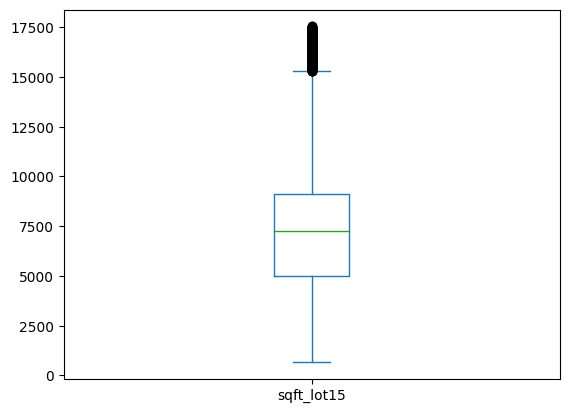

In [463]:
vector = dataset.loc[:, 'sqft_lot15']
q75 = vector.quantile(0.75)
q25 = vector.quantile(0.25)
IQR = q75 - q25
vector = vector[(vector >=  q25 - IQR*1.5) & (vector <= q75 + IQR*1.5)]
vector.plot(kind='box')
vector.describe()


As we can see, the boxplot here still lists some outliers, but that's because the data has changed. We can prove that these are not true outliers with the following:

In [464]:
max_theo = q75 + IQR*1.5
print(max_theo)
print(max(vector))
# max_theo (max_theoretical) >= max(vector)

17557.5
17550


In [465]:
# show this to someone who has never seen a line of code before and they might get an aneurysm. Don't do that.
#dataset = dataset.iloc[list(set(dataset.index).difference((set(dataset.index).symmetric_difference(set(vector.index))))), :] 
dataset = dataset.iloc[list(set(dataset.index).intersection(set(vector.index)))]
#print(list(set(dataset.index).intersection(set(vector.index))))
dataset

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,1955,98178,47.5112,-122.257,1340,5650,221900.0
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,1933,98028,47.7379,-122.233,2720,8062,180000.0
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,1965,98136,47.5208,-122.393,1360,5000,604000.0
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,1987,98074,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,2009,98103,47.6993,-122.346,1530,1509,360000.0
21609,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,2014,98146,47.5107,-122.362,1830,7200,400000.0
21610,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,2009,98144,47.5944,-122.299,1020,2007,402101.0
21611,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,2004,98027,47.5345,-122.069,1410,1287,400000.0


### The concept works. Now let's iteratively implement it into the whole dataset:

In [466]:
dataset.info()
print(dataset.loc[21612, :])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19419 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             19419 non-null  int64         
 1   date           19419 non-null  datetime64[ns]
 2   bedrooms       19419 non-null  int64         
 3   bathrooms      19419 non-null  float64       
 4   sqft_living    19419 non-null  int64         
 5   sqft_lot       19419 non-null  int64         
 6   floors         19419 non-null  float64       
 7   waterfront     19419 non-null  int64         
 8   view           19419 non-null  int64         
 9   condition      19419 non-null  int64         
 10  grade          19419 non-null  int64         
 11  sqft_above     19419 non-null  int64         
 12  sqft_basement  19419 non-null  int64         
 13  yr_built       19419 non-null  int64         
 14  yr_renovated   19419 non-null  int64         
 15  zipcode        1941

In [467]:
# for every column, get the vector of rows inside the whisker's range
# afterwards, use set operations to modify the dataset in such a way that it only has the indexes that haven't been picked out

def remove_outliers(dataset):
    dataset_columns = list(dataset.columns)
    for column in dataset_columns:
        vector = dataset[column]
        q25 = vector.quantile(0.25)
        q75 = vector.quantile(0.75)
        IQR = q75 - q25
        vector = vector[(vector >= q25 - IQR*1.5) & (vector <= q75 + IQR*1.5)]
        #print(len(list(set(dataset.index).difference((set(dataset.index).symmetric_difference(set(vector.index)))))))
        #print(len(set(dataset.index).intersection(set(vector.index))))
        dataset = dataset.loc[list(set(dataset.index).intersection(set(vector.index)))] 
    return dataset

dataset = remove_outliers(dataset.drop(['id', 'date', 'zipcode'], 1))
dataset

/tmp/ipykernel_12911/1472235495.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset = remove_outliers(dataset.drop(['id', 'date', 'zipcode'], 1))


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1955,47.5112,-122.257,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1933,47.7379,-122.233,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1965,47.5208,-122.393,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1987,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,2009,47.6993,-122.346,1530,1509,360000.0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,2014,47.5107,-122.362,1830,7200,400000.0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,2009,47.5944,-122.299,1020,2007,402101.0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,2004,47.5345,-122.069,1410,1287,400000.0


<AxesSubplot:>

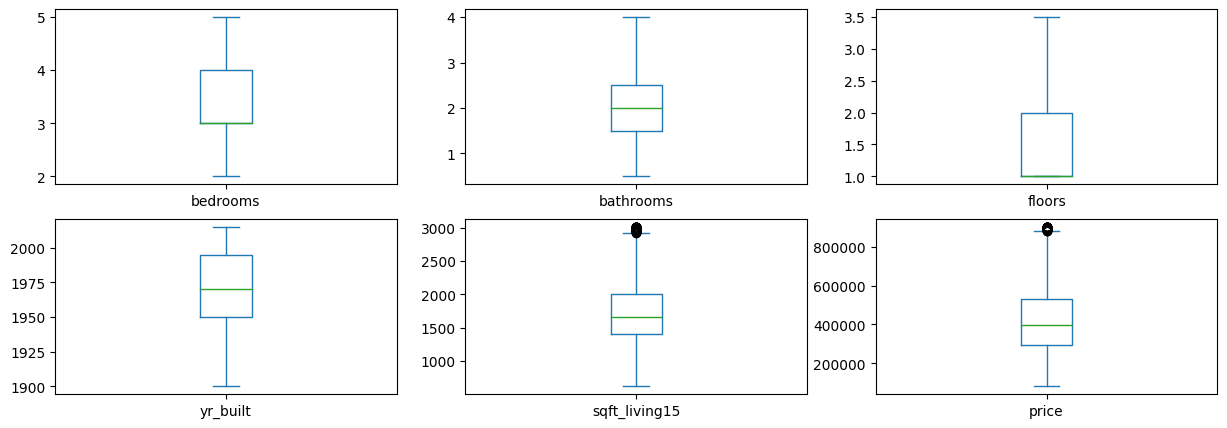

In [472]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

dataset['bedrooms'].plot(kind='box', ax=axes[0][0])
dataset['bathrooms'].plot(kind='box', ax=axes[0][1])
dataset['floors'].plot(kind='box', ax=axes[0][2])
dataset['yr_built'].plot(kind='box', ax=axes[1][0])
dataset['sqft_living15'].plot(kind='box', ax=axes[1][1])
dataset['price'].plot(kind='box', ax=axes[1][2])

### Look at that! It seems that the outliers are now removed. (Like shown a few cells before, the graph still has some outliers, but that's because the data has changed. Those are inside the original whiskers' range.)